01. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path = r'/Users/kevinclancy/Desktop/NFL'

02. Import Data

In [5]:
spreads = pd.read_csv(os.path.join(path, '02 Data', 'cleaned data', 'NFL_spreads.csv'))

03. Exploring Relationships

In [7]:
spreads.dtypes

game_date               object
season                   int64
week                     int64
day_of_week              int64
time_of_game            object
primetime                int64
playoff_game             int64
team_home               object
score_home               int64
score_away               int64
team_away               object
team_favored_id         object
point_spread           float64
total_line             float64
stadium                 object
game_location           object
stadium_neutral          int64
weather_temperature      int64
wind_mph                 int64
indoor                   int64
precipitation           object
point_differential       int64
total_points_scored      int64
home_favorite            int64
away_favorite            int64
total_result             int64
result                   int64
cover_result             int64
dtype: object

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
#sort teams to map to unique integer
unique_teams = sorted(spreads['team_favored_id'].unique())

In [10]:
# create dict to map teams 
team_id_map = {team: i + 1 for i, team in enumerate(unique_teams)}

In [11]:
print(team_id_map)

{'ARI': 1, 'ATL': 2, 'BAL': 3, 'BUF': 4, 'CAR': 5, 'CHI': 6, 'CIN': 7, 'CLE': 8, 'DAL': 9, 'DEN': 10, 'DET': 11, 'GB': 12, 'HOU': 13, 'IND': 14, 'JAX': 15, 'KC': 16, 'LAC': 17, 'LAR': 18, 'LVR': 19, 'MIA': 20, 'MIN': 21, 'NE': 22, 'NO': 23, 'NYG': 24, 'NYJ': 25, 'PHI': 26, 'PICK': 27, 'PIT': 28, 'SEA': 29, 'SF': 30, 'TB': 31, 'TEN': 32, 'WAS': 33}


In [12]:
# create column for team_int
spreads['team_favored_id_int'] = spreads['team_favored_id'].map(team_id_map)

In [13]:
spreads.head(5)

,game_date,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_neutral,weather_temperature,wind_mph,indoor,precipitation,point_differential,total_points_scored,home_favorite,away_favorite,total_result,result,cover_result,team_favored_id_int
0,9/8/16,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado",0,82,2,0,NaN,1,41,0,1,1,1,1,5
1,9/11/16,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona",0,72,0,1,NaN,-2,44,1,0,2,0,0,1
2,9/11/16,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",0,72,0,1,NaN,-7,55,1,0,1,0,0,2
3,9/11/16,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland",0,82,7,0,NaN,6,20,1,0,0,1,1,3
4,9/11/16,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas",0,72,0,1,NaN,-1,39,0,1,0,0,2,24


In [14]:
# create subset without categorical columns
df = spreads[['week','primetime', 'team_favored_id_int', 'point_spread', 'point_differential', 'total_line', 'weather_temperature', 'wind_mph', 'indoor', 'total_points_scored', 'total_result', 'result', 'home_favorite', 'score_home', 'score_away', 'away_favorite','cover_result']]

In [15]:
df.corr()

,week,primetime,team_favored_id_int,point_spread,point_differential,total_line,weather_temperature,wind_mph,indoor,total_points_scored,total_result,result,home_favorite,score_home,score_away,away_favorite,cover_result
week,1.000000,0.029540,0.034299,-0.112072,0.053227,-0.076196,-0.502040,0.039354,-0.001332,-0.010468,0.001092,0.043384,0.016106,0.030074,-0.045628,-0.015590,0.018266
primetime,0.029540,1.000000,0.038351,0.017579,0.009798,0.091937,-0.075564,-0.070632,-0.015966,-0.009824,-0.014292,0.026767,0.016323,0.000029,-0.014023,-0.019477,0.013658
team_favored_id_int,0.034299,0.038351,1.000000,-0.011580,-0.027728,-0.003068,0.011482,0.025382,-0.116014,-0.009820,-0.014631,-0.030308,-0.039389,-0.026317,0.012892,0.036345,0.010035
point_spread,-0.112072,0.017579,-0.011580,1.000000,-0.151273,-0.008604,0.096741,-0.074231,0.043289,-0.023540,0.008866,-0.138651,-0.154343,-0.122631,0.091723,0.150166,-0.003413
point_differential,0.053227,0.009798,-0.027728,-0.151273,1.000000,-0.041083,-0.037026,0.011978,-0.011733,0.021174,0.005524,0.777155,0.325941,0.716911,-0.702093,-0.325279,0.613387
total_line,-0.076196,0.091937,-0.003068,-0.008604,-0.041083,1.000000,0.177658,-0.179543,0.192825,0.312998,0.002964,-0.037389,0.003688,0.189414,0.252396,-0.003942,-0.064112
weather_temperature,-0.502040,-0.075564,0.011482,0.096741,-0.037026,0.177658,1.000000,-0.346146,0.404082,0.077077,0.020992,-0.035025,-0.016091,0.027750,0.081452,0.017456,-0.011231
wind_mph,0.039354,-0.070632,0.025382,-0.074231,0.011978,-0.179543,-0.346146,1.000000,-0.669581,-0.167558,-0.080545,0.018366,-0.019550,-0.108431,-0.127933,0.020101,0.020036
indoor,-0.001332,-0.015966,-0.116014,0.043289,-0.011733,0.192825,0.404082,-0.669581,1.000000,0.124208,0.032324,-0.025674,0.024608,0.078375,0.096881,-0.022784,-0.031904
total_points_scored,-0.010468,-0.009824,-0.009820,-0.023540,0.021174,0.312998,0.077077,-0.167558,0.124208,1.000000,0.715092,-0.002627,0.053237,0.712188,0.697060,-0.054438,-0.005777


In [16]:
# rename weather_temperature in df to fit correlation heatmap
df = df.rename(columns={'weather_temperature':'weather_temp'})

In [17]:
df.corr()

,week,primetime,team_favored_id_int,point_spread,point_differential,total_line,weather_temp,wind_mph,indoor,total_points_scored,total_result,result,home_favorite,score_home,score_away,away_favorite,cover_result
week,1.000000,0.029540,0.034299,-0.112072,0.053227,-0.076196,-0.502040,0.039354,-0.001332,-0.010468,0.001092,0.043384,0.016106,0.030074,-0.045628,-0.015590,0.018266
primetime,0.029540,1.000000,0.038351,0.017579,0.009798,0.091937,-0.075564,-0.070632,-0.015966,-0.009824,-0.014292,0.026767,0.016323,0.000029,-0.014023,-0.019477,0.013658
team_favored_id_int,0.034299,0.038351,1.000000,-0.011580,-0.027728,-0.003068,0.011482,0.025382,-0.116014,-0.009820,-0.014631,-0.030308,-0.039389,-0.026317,0.012892,0.036345,0.010035
point_spread,-0.112072,0.017579,-0.011580,1.000000,-0.151273,-0.008604,0.096741,-0.074231,0.043289,-0.023540,0.008866,-0.138651,-0.154343,-0.122631,0.091723,0.150166,-0.003413
point_differential,0.053227,0.009798,-0.027728,-0.151273,1.000000,-0.041083,-0.037026,0.011978,-0.011733,0.021174,0.005524,0.777155,0.325941,0.716911,-0.702093,-0.325279,0.613387
total_line,-0.076196,0.091937,-0.003068,-0.008604,-0.041083,1.000000,0.177658,-0.179543,0.192825,0.312998,0.002964,-0.037389,0.003688,0.189414,0.252396,-0.003942,-0.064112
weather_temp,-0.502040,-0.075564,0.011482,0.096741,-0.037026,0.177658,1.000000,-0.346146,0.404082,0.077077,0.020992,-0.035025,-0.016091,0.027750,0.081452,0.017456,-0.011231
wind_mph,0.039354,-0.070632,0.025382,-0.074231,0.011978,-0.179543,-0.346146,1.000000,-0.669581,-0.167558,-0.080545,0.018366,-0.019550,-0.108431,-0.127933,0.020101,0.020036
indoor,-0.001332,-0.015966,-0.116014,0.043289,-0.011733,0.192825,0.404082,-0.669581,1.000000,0.124208,0.032324,-0.025674,0.024608,0.078375,0.096881,-0.022784,-0.031904
total_points_scored,-0.010468,-0.009824,-0.009820,-0.023540,0.021174,0.312998,0.077077,-0.167558,0.124208,1.000000,0.715092,-0.002627,0.053237,0.712188,0.697060,-0.054438,-0.005777


Text(0.5, 1.0, 'Correlation Matrix')

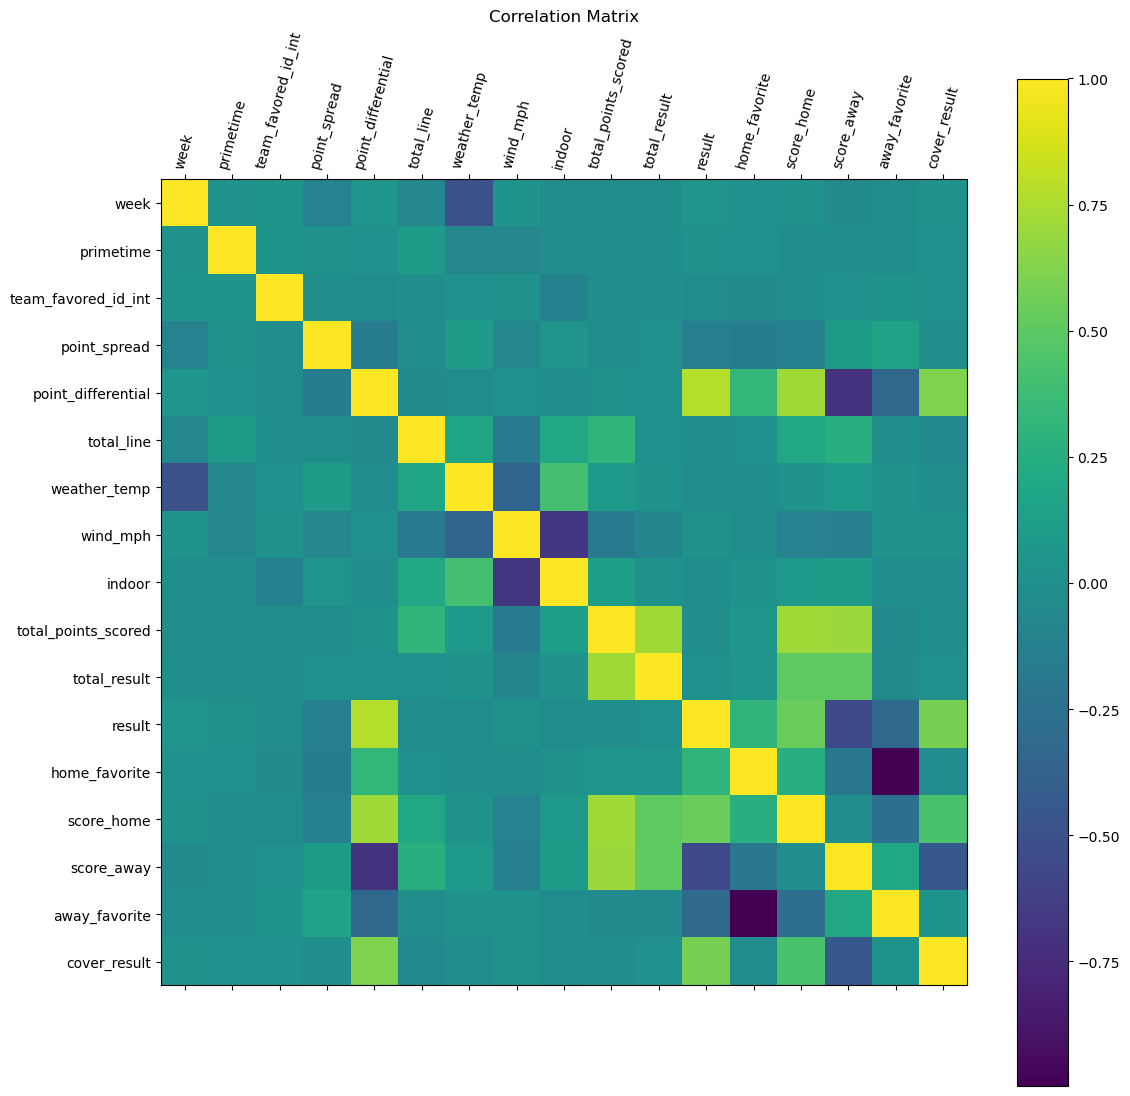

In [18]:
# create correlation heatmap
sp = plt.figure(figsize=(13, 13))
plt.matshow(df.corr(), fignum=sp.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize = 10, rotation=75)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 10)
cb = plt.colorbar()
plt.title('Correlation Matrix')

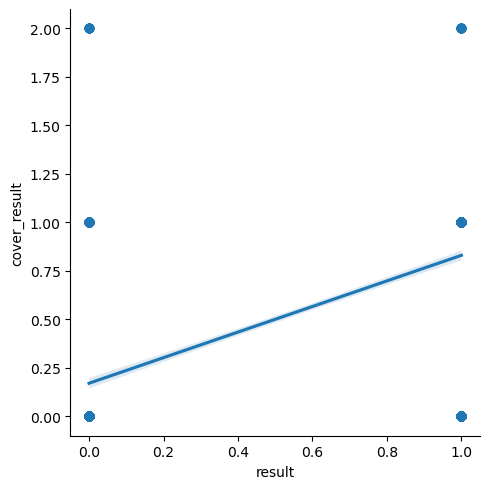

In [19]:
# create scatterplot of result and cover_result
sns.lmplot(x = 'result', y = 'cover_result', data = df)

There is a .588 correlation coefficient between Result and Cover Result, this indicates a moderately strong positive correlation. We can interpret this as when either team wins (home or away) they often do so by a margin that covers the spread set by oddsmakers. 

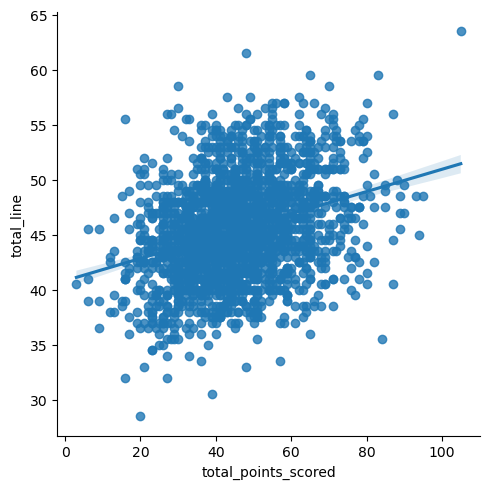

In [21]:
# create scatterplot of total_points_scored and total_line
sns.lmplot(x = 'total_points_scored', y = 'total_line', data = df)

With a 0.312 correlation coefficient between Total_Points_Scored and Total_Line this suggests a moderate positive correlation. This indicates that oddsmakers adjust the total line based on their expectations for scoring in a game. The moderately positive correlation indicates that expected scoring totals and the actual scoring totals in games are relatively accurate.

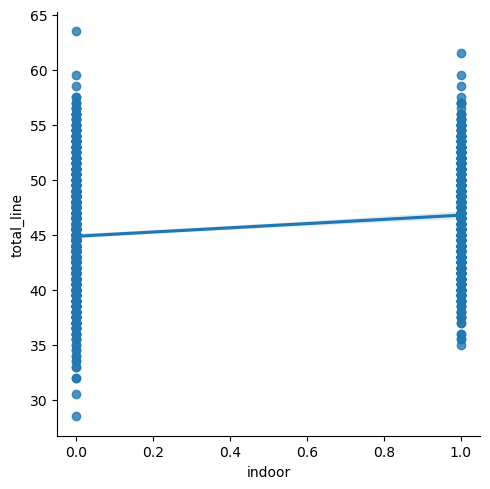

In [23]:
# create scatterplot of indoor and total_line
sns.lmplot(x = 'indoor', y = 'total_line', data = df)

With a 0.19 correlation coefficient between Indoor and Total_Line suggests that there is a weak positive correlation. One possible explanation for this is that indoor conditions remove outside weather factors, therefore overall game performance between teams is expected to be more consistent. This could lead to oddsmakers setting the total_line higher for indoor games compared to outdoor games.

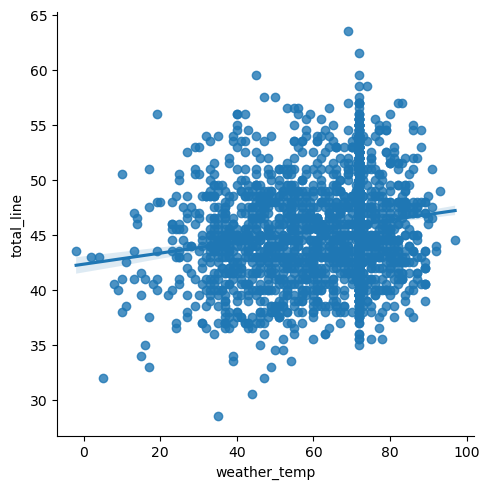

In [25]:
# create scatterplot of weather_temp and total_line
sns.lmplot(x = 'weather_temp', y = 'total_line', data = df)

There is a 0.177 correlation coefficient between Weather Temp and Total Line, this indicates a weak positive correlation that when the temperature increasese the total_line also increases and vice_versa. With indoor stadiums being set at a default of 72 would be interesting to see the correlation coefficient if we removed all those games. 

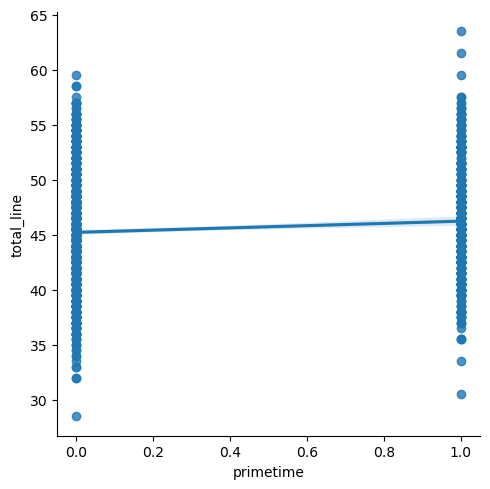

In [27]:
# create scatterplot of primetime and total_line
sns.lmplot(x = 'primetime', y = 'total_line', data = df)

With a .09 correlation coefficient, this indicates that there is a very weak positive correlation between primetime games and total_line. One possible explanation is that primetime games are typically reserved for teams that are higher-profile, therefore oddsmakers may set total_lines higher in anticpation of a higher scoring matchup.

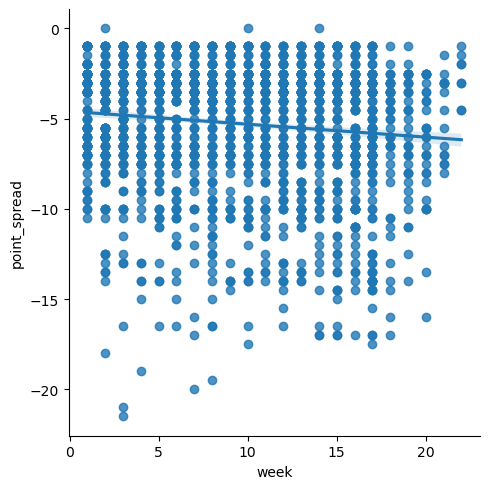

In [29]:
# create a scatterplot of week and point_spread
sns.lmplot(x = 'week', y = 'point_spread', data = df)

With a correlation coefficient of -.11 between Point Spread and Week, this suggests that there is a tendency for the variables to move in opposite directions. One cause for this could be that as the season goes on, oddsmakers are adjusting point spreads based off teams actual performances. 

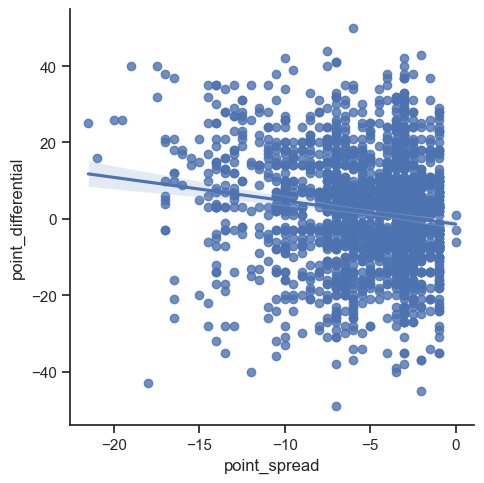

In [146]:
# create a scatterplot of point spread and point differential
sns.lmplot(x = 'point_spread', y = 'point_differential', data = df)

With a correlation coefficient of -.15 between the point spread set by oddsmakers and the actual margin of victory, this suggests that there is a weak negative relationship between the two. This tells us that the predicted point spread does not predict the actual margin of victory very well.

In [31]:
subdf = spreads[['result', 'cover_result', 'week', 'point_spread', 'primetime', 'total_line', 'weather_temperature', 'total_points_scored']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

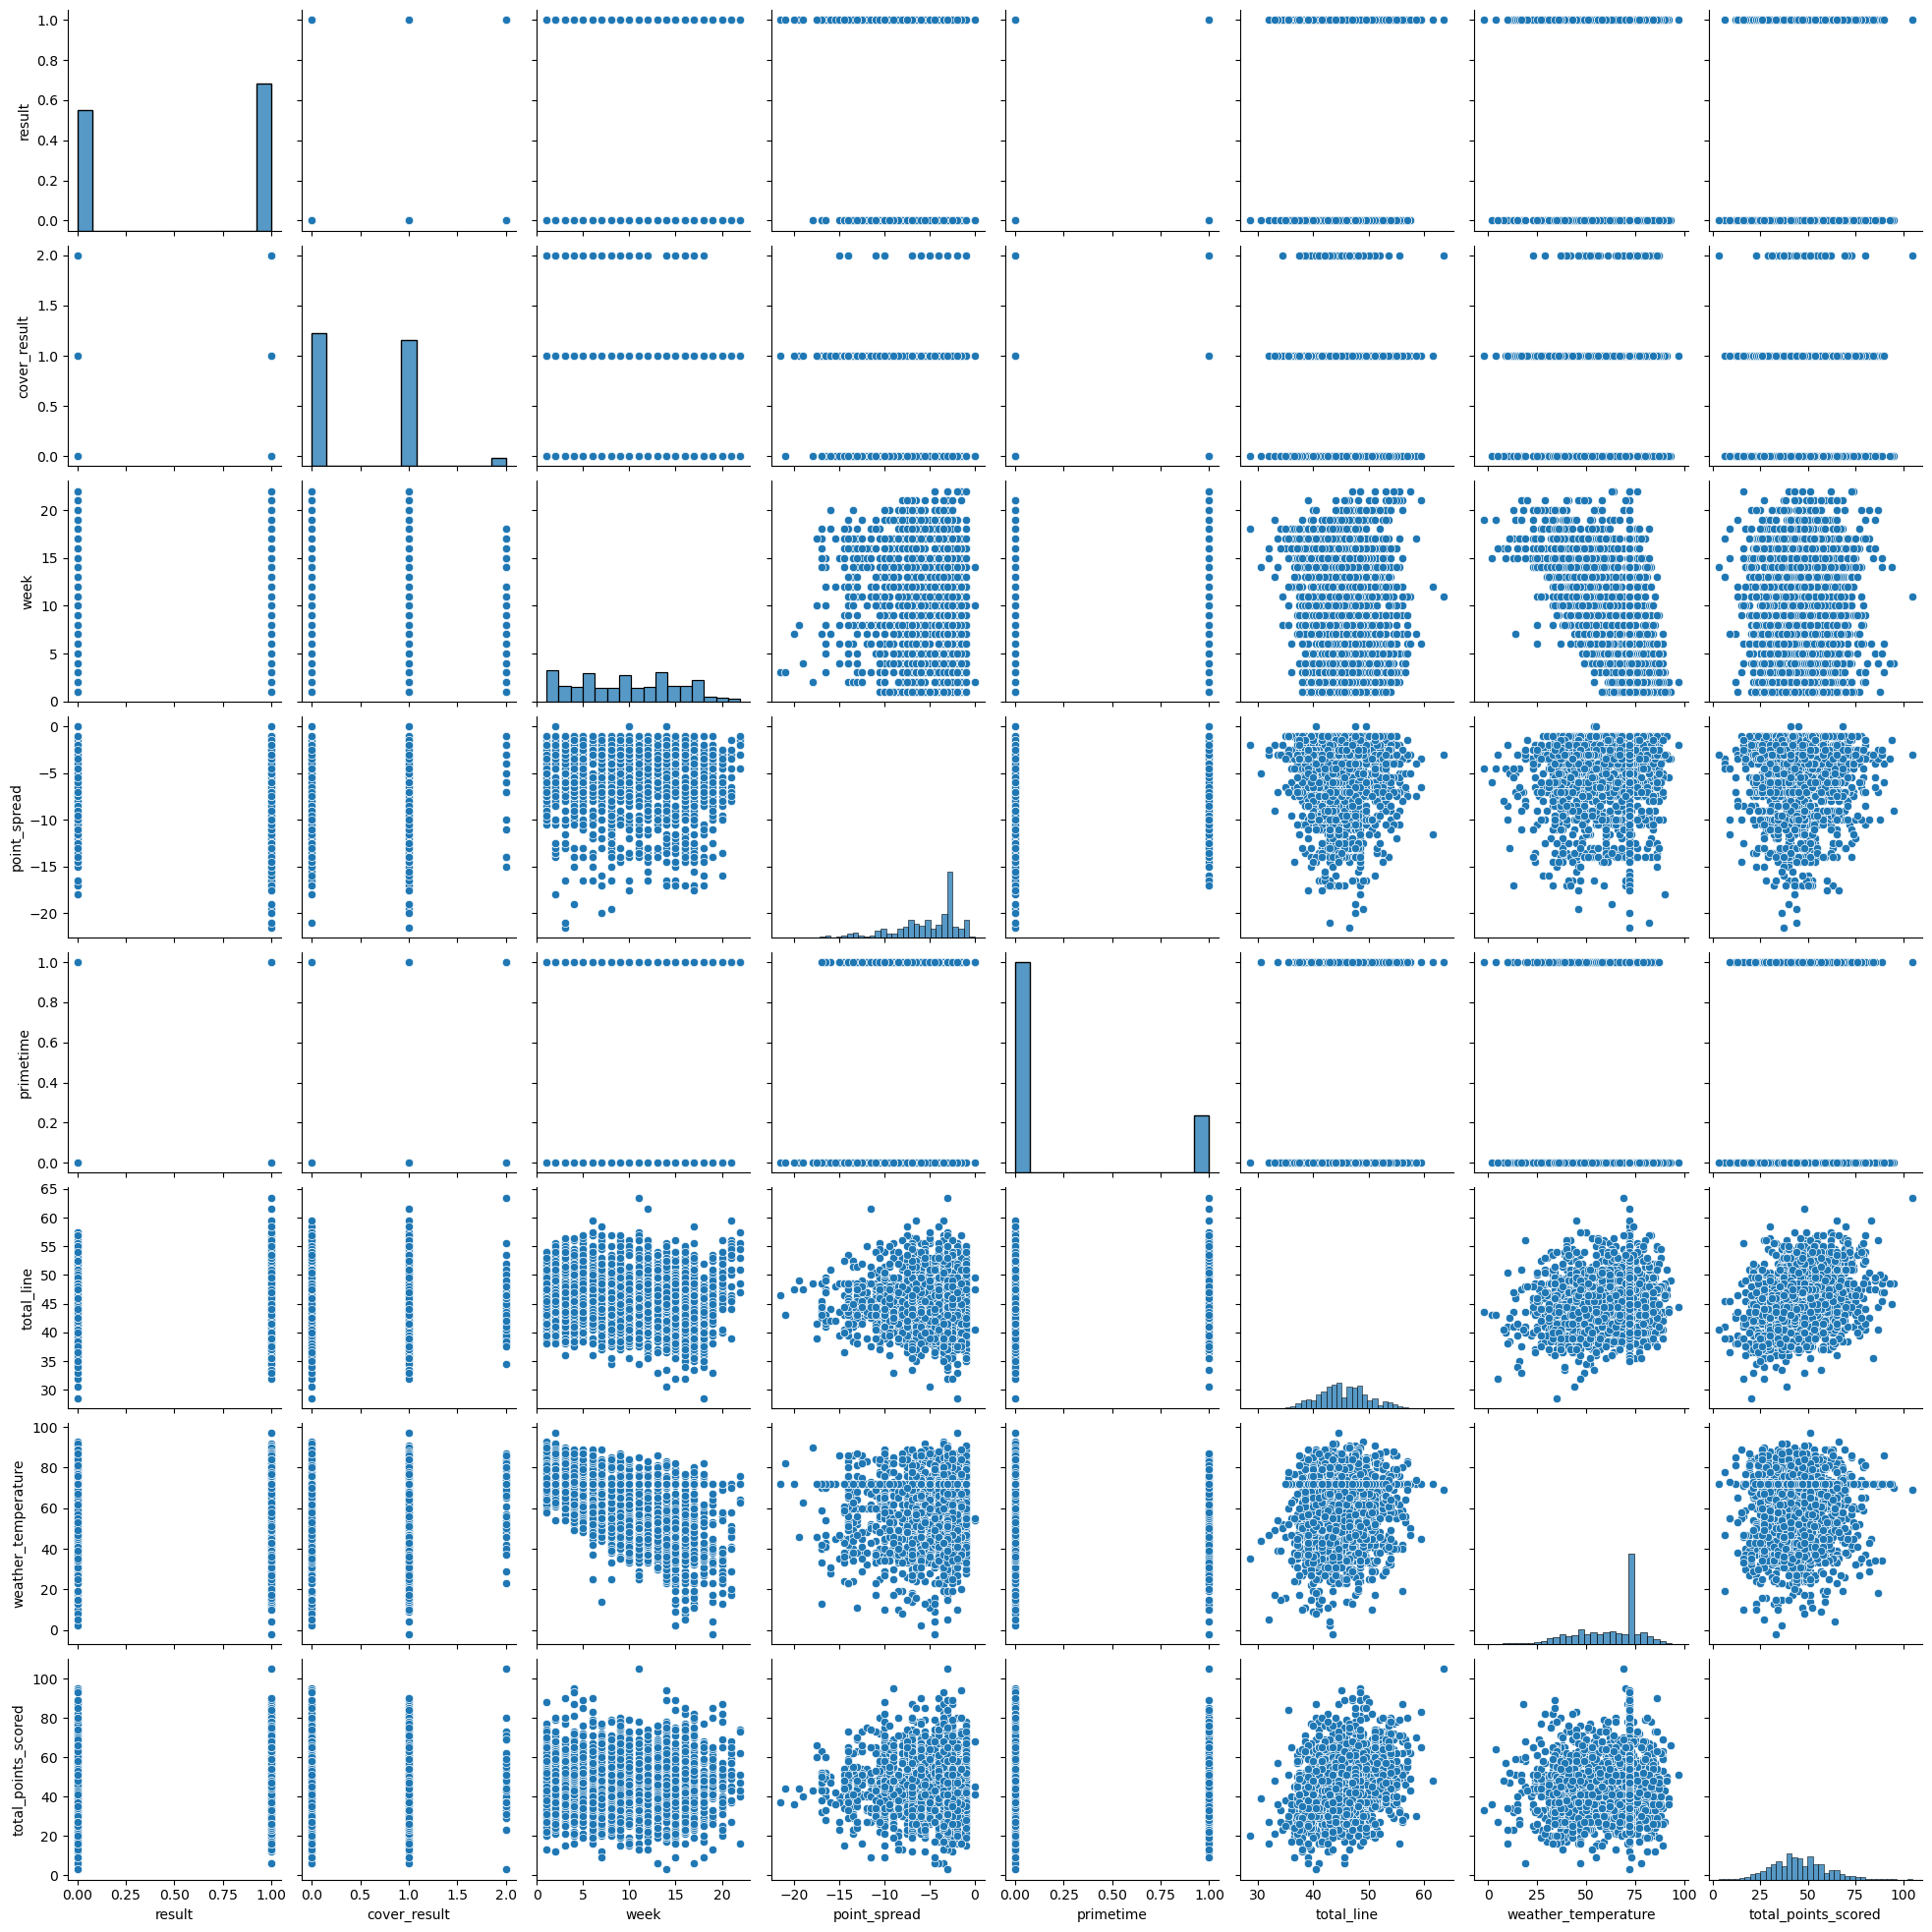

In [32]:
# create pairplot of subdf
sns.pairplot(subdf)

A few things stick out to me, first is week and point_spreads, they begin rather tight and as the season progresses we see more outliers or higher than normal spreads but as the season progresses they become tighter again. Along with point_spreads if we look at week and total_line, they once again start tight but as the season progresses we see the dots expand, until around playoffs where the dots once again come back down. Weather_temp and week is an obvious one considering the season begins at the end of summer/beginning of fall and progresses through til February. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='point_spread', ylabel='Count'>

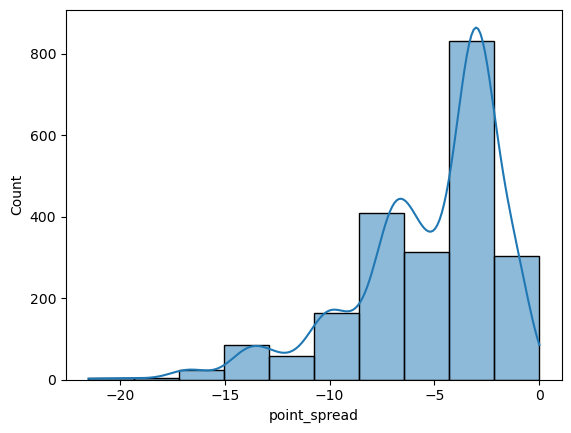

In [34]:
# create histogram to see point_spread distribution
sns.histplot(spreads['point_spread'], bins = 10, kde = True)

In [35]:
spreads.loc[spreads['point_spread'] >= -3, 'spread_category'] = 'Low Spread'

In [36]:
spreads.loc[(spreads['point_spread'] < -3) & (spreads['point_spread'] >= -7.5), 'spread_category'] = 'Medium Spread'

In [37]:
spreads.loc[(spreads['point_spread'] < -7.5), 'spread_category'] = 'High Spread'

In [38]:
spreads['spread_category'].value_counts(dropna = False)

spread_category
Medium Spread    945
Low Spread       841
High Spread      405
Name: count, dtype: int64

In [39]:
spreads.head(5)

,game_date,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_neutral,weather_temperature,wind_mph,indoor,precipitation,point_differential,total_points_scored,home_favorite,away_favorite,total_result,result,cover_result,team_favored_id_int,spread_category
0,9/8/16,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado",0,82,2,0,NaN,1,41,0,1,1,1,1,5,Low Spread
1,9/11/16,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona",0,72,0,1,NaN,-2,44,1,0,2,0,0,1,High Spread
2,9/11/16,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",0,72,0,1,NaN,-7,55,1,0,1,0,0,2,Low Spread
3,9/11/16,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland",0,82,7,0,NaN,6,20,1,0,0,1,1,3,Low Spread
4,9/11/16,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas",0,72,0,1,NaN,-1,39,0,1,0,0,2,24,Low Spread


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


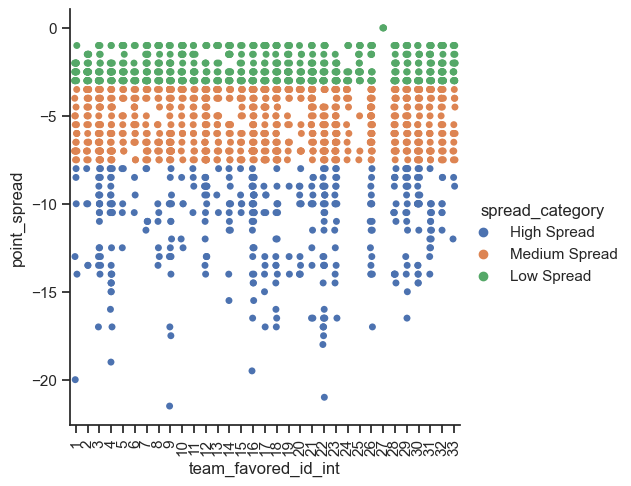

In [40]:
# create catplot using team_favored_id_int, point_spread and categories created above.
sns.set(style="ticks")
catplot = sns.catplot(x = "team_favored_id_int", y = "point_spread", hue = "spread_category", data = spreads)
catplot.set_xticklabels(rotation=90)

In [41]:
pd.set_option("display.max_rows", None)

In [42]:
# group team_favored_id and spread_category
group = spreads.groupby(['team_favored_id', 'spread_category']).size()

In [43]:
print(group)

team_favored_id  spread_category
ARI              High Spread         6
                 Low Spread         20
                 Medium Spread      20
ATL              High Spread         5
                 Low Spread         33
                 Medium Spread      30
BAL              High Spread        24
                 Low Spread         27
                 Medium Spread      47
BUF              High Spread        29
                 Low Spread         23
                 Medium Spread      34
CAR              High Spread         5
                 Low Spread         29
                 Medium Spread      16
CHI              High Spread         3
                 Low Spread         18
                 Medium Spread      22
CIN              High Spread         6
                 Low Spread         33
                 Medium Spread      23
CLE              High Spread         6
                 Low Spread         29
                 Medium Spread      19
DAL              High Spread   

Using the unique integers mapped to team ids I used a catplot to cross teams_favored_id and point_spreads. In the above cell I grouped them just to see the count of spreads associated with team_favored_id's. We can use the value counts to determine how good teams were. For an example we can see that NE was a high spread favorite 35 times compared to WAS who was a high spread favorite only 3 times. 

In [45]:
# count total number of games where the home team was favored
wholehome = spreads['home_favorite'].sum()

In [46]:
# count total number of games where the away team was favored
wholeaway = spreads['away_favorite'].sum()

In [47]:
# filter to determine home_favorites and instances where the home team covered the spread
filter = spreads[(spreads['home_favorite'] == 1) & (spreads['cover_result'] ==1)]

In [48]:
# group and count the home_favorites and covering
homecover = filter.groupby(['home_favorite', 'cover_result']).size()

In [49]:
print(homecover)

home_favorite  cover_result
1              1               640
dtype: int64


In [50]:
# filter away_favorites and instances where the away team covered
# i used home_favorite = 0 because it means the same thing as away favorite = 1 and kept the output table uniform
filters = spreads[(spreads['home_favorite'] == 0) & (spreads['cover_result'] ==0)]

In [51]:
# group and count the away_favorites and covering 
awaycover = filters.groupby(['home_favorite', 'cover_result']).size()

In [52]:
print(awaycover)

home_favorite  cover_result
0              0               389
dtype: int64


In [53]:
# filter to determine home_favorites and instances where the home didn't cover the spread
filtered = spreads[(spreads['home_favorite'] == 1) & (spreads['cover_result'].isin([0,2]))]

In [54]:
# group and count the games where the home_team was favored and didn't cover the spread
homenocover = filtered.groupby(['home_favorite', 'cover_result']).size()

In [55]:
print(homenocover)

home_favorite  cover_result
1              0               701
               2                38
dtype: int64


In [56]:
# filter away_favorites and instances where the away team didn't cover the spread
filtering = spreads[(spreads['home_favorite'] == 0) & (spreads['cover_result'].isin([1,2]))]

In [57]:
# group and count the away favorites and instances where the away team didn't cover
awaynocover = filtering.groupby(['home_favorite', 'cover_result']).size()

In [58]:
print(awaynocover)

home_favorite  cover_result
0              1               393
               2                30
dtype: int64


In [59]:
# calculate percentages
def calculate_percentage(part, whole):
    return (part / whole) * 100

In [60]:
# home_favorite_cover
homefavcover = calculate_percentage(homecover,wholehome)
# away_favorite cover
awayfavcover = calculate_percentage(awaycover,wholeaway)
# home_favorite no cover
homefavnocover = calculate_percentage(homenocover,wholehome)
# away_favorite no cover
awayfavnocover = calculate_percentage(awaynocover,wholeaway)

In [61]:
print(homefavcover, awayfavcover, homefavnocover, awayfavnocover) 

home_favorite  cover_result
1              1               46.410442
dtype: float64 home_favorite  cover_result
0              0               48.084054
dtype: float64 home_favorite  cover_result
1              0               50.833938
               2                2.755620
dtype: float64 home_favorite  cover_result
0              1               48.578492
               2                3.708282
dtype: float64


Interesting to see that if you wager against the home favorite you are 7% more likely to win or get a push

In [63]:
# count total number of games where the home team was favored in primetime
filterprime = spreads[(spreads['home_favorite'] ==1) & (spreads['primetime'] ==1)]

In [64]:
# group home fav and primetime
primehomewhole = filterprime.groupby(['home_favorite', 'primetime']).size()

In [65]:
print(primehomewhole)

home_favorite  primetime
1              1            301
dtype: int64


In [66]:
# filter home_favorite, primetime, and where the home favorite covered
primetimehome = spreads[(spreads['home_favorite'] == 1) & (spreads['cover_result'] == 1) & (spreads['primetime'] == 1)]

In [67]:
# group home_favorites, primetime, and where the home favorite covered
homeprimetimecover = primetimehome.groupby(['home_favorite', 'cover_result', 'primetime']).size()

In [68]:
print(homeprimetimecover)

home_favorite  cover_result  primetime
1              1             1            142
dtype: int64


In [69]:
# filter away_favorite and primetime games 
filterprimeaway = spreads[(spreads['home_favorite'] == 0) & (spreads['primetime'] == 1)]

In [70]:
# group away_favorite and primetime games
primeawaywhole = filterprimeaway.groupby(['home_favorite', 'primetime']).size()

In [71]:
print(primeawaywhole)

home_favorite  primetime
0              1            166
dtype: int64


In [72]:
# filter away_favorite, primetime, and where the away favorite covered
primetimeaway = spreads[(spreads['home_favorite'] == 0) & (spreads['cover_result']==0) & (spreads['primetime'] == 1)]

In [73]:
primetimeawaycover = primetimeaway.groupby(['home_favorite', 'cover_result', 'primetime']).size()

In [74]:
print(primetimeawaycover)

home_favorite  cover_result  primetime
0              0             1            74
dtype: int64


In [75]:
# home_favorite primetime cover
homeprimecover = calculate_percentage(homeprimetimecover,primehomewhole)
# away_favorite primetime cover
awayprimecover = calculate_percentage(primetimeawaycover,primeawaywhole)

In [76]:
print(homeprimecover, awayprimecover)

home_favorite  primetime  cover_result
1              1          1               47.17608
dtype: float64 home_favorite  primetime  cover_result
0              1          0               44.578313
dtype: float64


Again if you bet against the home_favorite in primetime you'd win or push almost 53% of the time. Inversly if you bet against the away_favorite in primetime you'd win or push 55% of the time.  

In sportsbetting if you win ~56% of wagers longterm you are considered an expert, these are very small sample sizes and not entirely indicative of the entire picture.

In [79]:
spreads.head()

,game_date,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_neutral,weather_temperature,wind_mph,indoor,precipitation,point_differential,total_points_scored,home_favorite,away_favorite,total_result,result,cover_result,team_favored_id_int,spread_category
0,9/8/16,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado",0,82,2,0,NaN,1,41,0,1,1,1,1,5,Low Spread
1,9/11/16,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona",0,72,0,1,NaN,-2,44,1,0,2,0,0,1,High Spread
2,9/11/16,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",0,72,0,1,NaN,-7,55,1,0,1,0,0,2,Low Spread
3,9/11/16,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland",0,82,7,0,NaN,6,20,1,0,0,1,1,3,Low Spread
4,9/11/16,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas",0,72,0,1,NaN,-1,39,0,1,0,0,2,24,Low Spread


In [80]:
# export spreads
spreads.to_csv(os.path.join(path,'02 Data', 'cleaned data', 'NFL_Spreads_updated.csv'))